<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/2_1_classifier_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

와인의 품종을 분류하는 문제를 머신러닝 알고리즘으로 어떻게 해결하는지 살펴봅니다.([분석 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine))

# 2.1 코드 미리보기

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 데이터 불러오기
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['label'] = data.target

# 데이터분할
X = df.drop(['label'], axis = 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# 학습
model = DecisionTreeClassifier(random_state=42, max_depth = 2)
model.fit(X_train, y_train)

# 평가
score = model.score(X_test, y_test)

# 예측
y_pred = model.predict([X_test.iloc[10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 2.2 머신러닝 모델 학습하기

## 2.2.1 데이터 불러오기

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

# 데이터 로딩
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['label'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.shape

(178, 14)

In [4]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
# 데이터프레임의 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [7]:
# 품종(label) 카테고리 확인
df['label'].value_counts().sort_index()

0    59
1    71
2    48
Name: label, dtype: int64

In [8]:
# 결측치 확인
df.isnull().sum().sum()

0

In [9]:
# 중복값 여부 확인
df.duplicated().sum()

0

<Axes: xlabel='label', ylabel='count'>

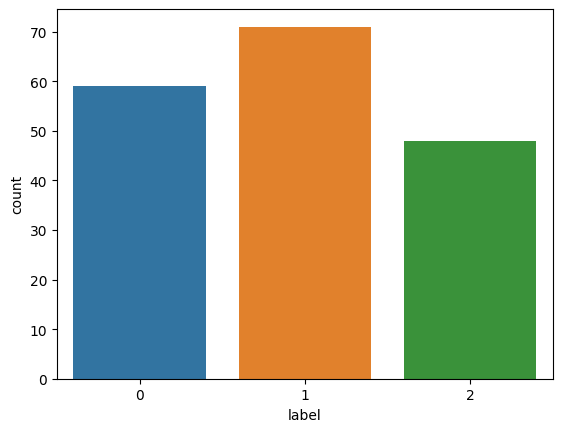

In [10]:
import seaborn as sns
sns.countplot(x='label', data = df)

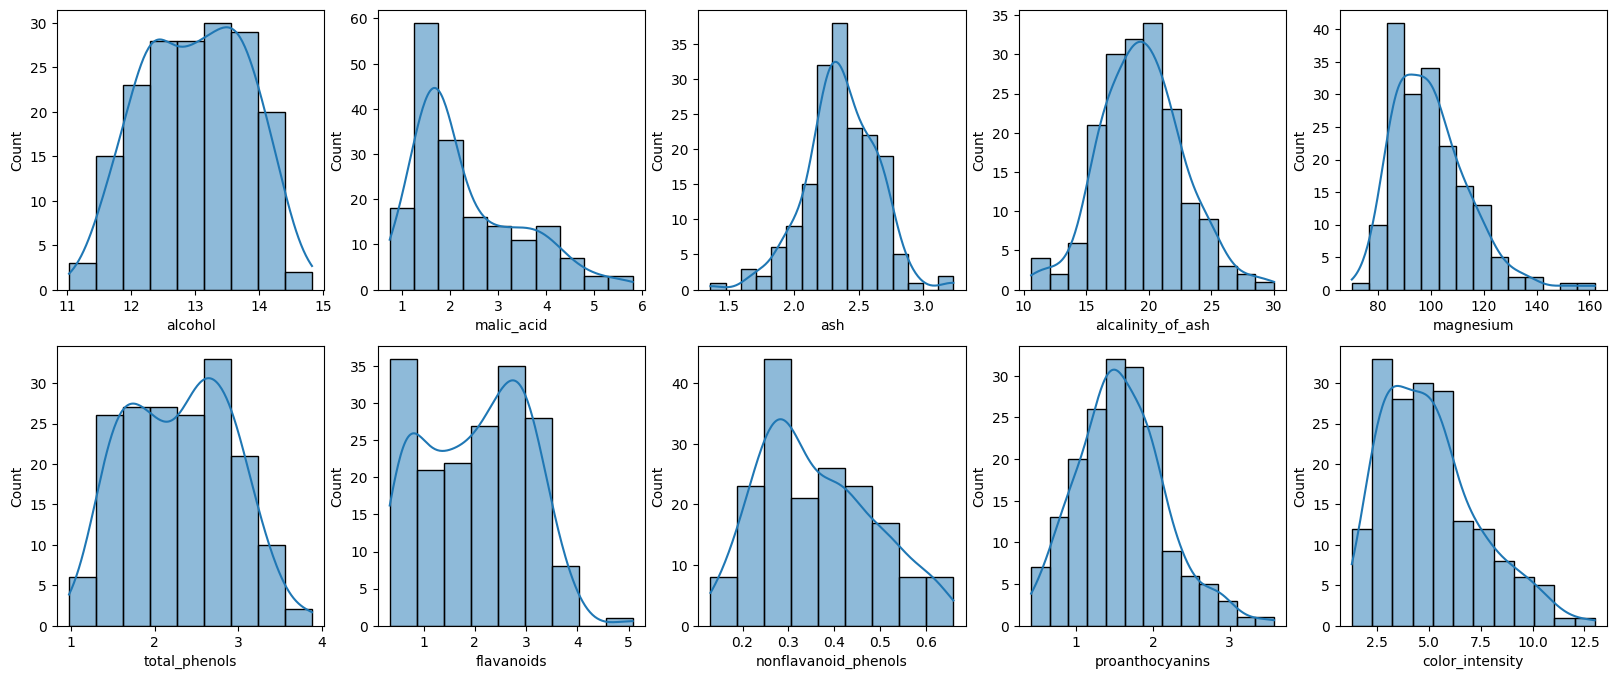

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5)
fig.set_size_inches(20,8)

for i in range(2):
    for j in range(5):
        attr = i * 5 + j
        sns.histplot(x = df.columns[attr], data = df,
                     kde = True, ax=axs[i][j])

## 2.2.2.데이터 분할

In [12]:
from sklearn.model_selection import train_test_split

# 데이터분할
X = df.drop(['label'], axis = 1)
y = df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
print("학습용 데이터 구조:{0}, 테스트용 데이터 구조: {1}".
      format(X_train.shape, X_test.shape))

학습용 데이터 구조:(133, 13), 테스트용 데이터 구조: (45, 13)


In [14]:
y_train.value_counts()

1    53
0    44
2    36
Name: label, dtype: int64

In [15]:
y_test.value_counts()

1    18
0    15
2    12
Name: label, dtype: int64

## 2.2.3.학습-의사결정나무

In [16]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier 객체 생성
model = DecisionTreeClassifier(random_state=42, max_depth = 2)
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

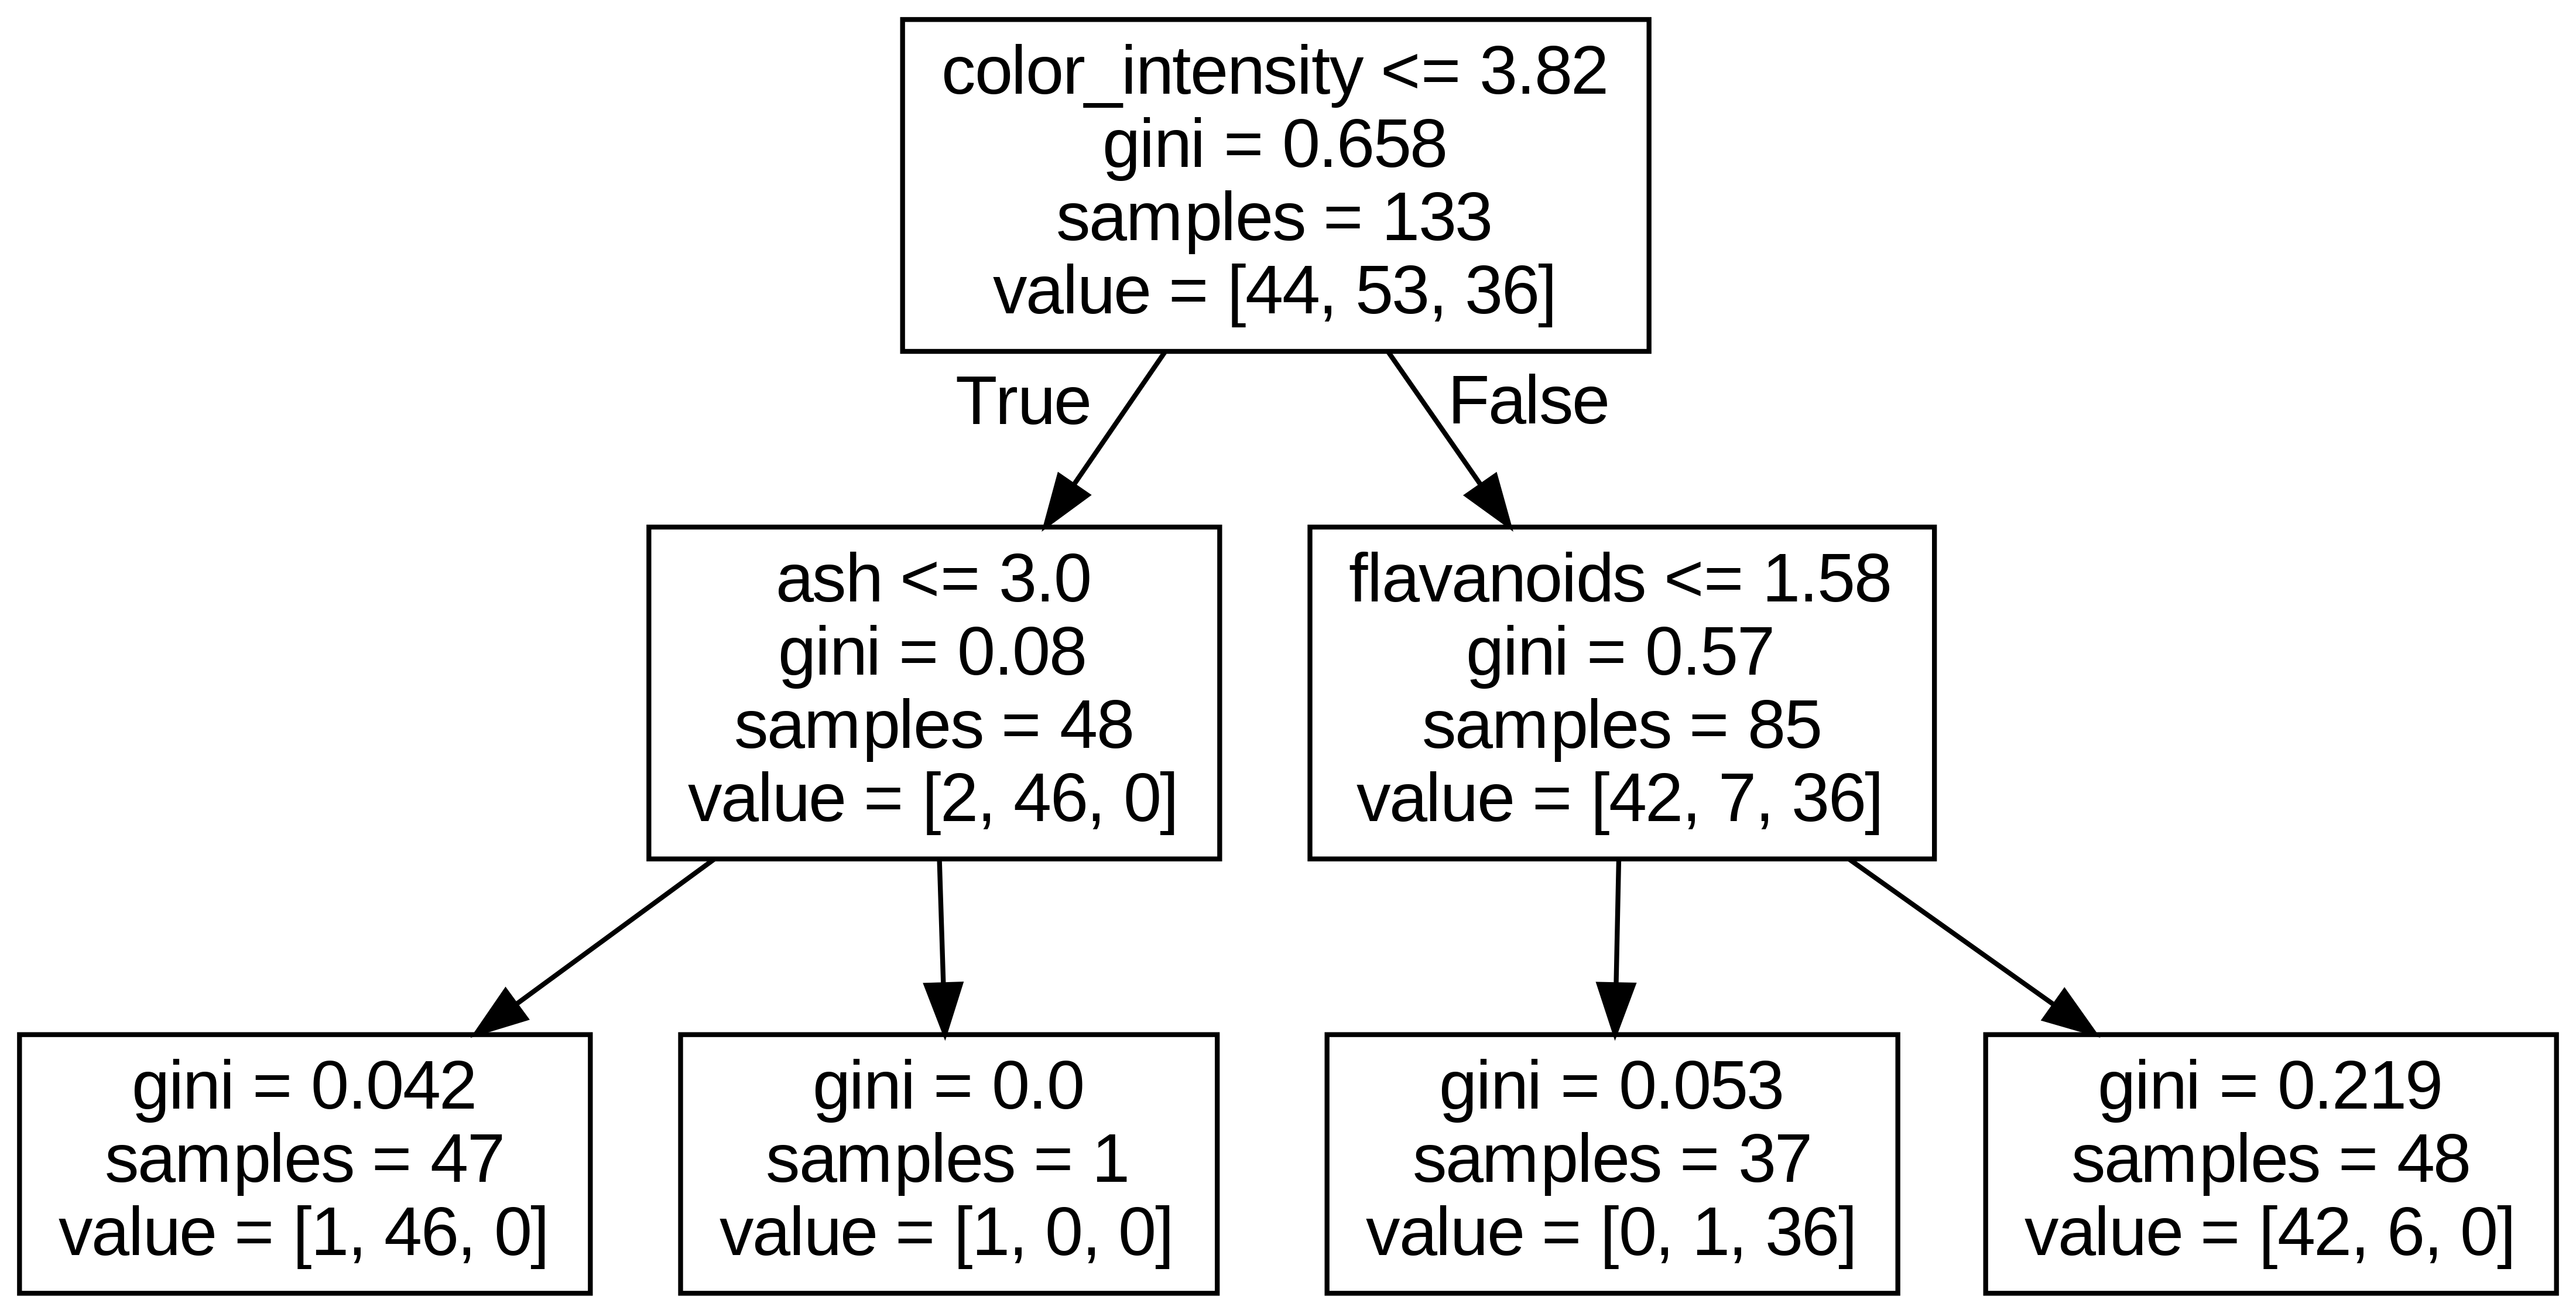

In [17]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 의사결정나무 모델을 dot 파일로 추출
export_graphviz(model, feature_names = X_train.columns, out_file='tree.dot')

# dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# png 출력
Image(filename = 'tree.png')

## 2.2.4 평가

In [18]:
#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
score

0.8666666666666667

## 2.2.5 예측

In [19]:
X_test.iloc[0]

alcohol                          13.48
malic_acid                        1.81
ash                               2.41
alcalinity_of_ash                20.50
magnesium                       100.00
total_phenols                     2.70
flavanoids                        2.98
nonflavanoid_phenols              0.26
proanthocyanins                   1.86
color_intensity                   5.10
hue                               1.04
od280/od315_of_diluted_wines      3.47
proline                         920.00
Name: 35, dtype: float64

In [20]:
y_pred = model.predict([X_test.iloc[0]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
y_test.iloc[0]

0